### Importing the Libraries

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Importing the Dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.drop(["Id"],axis=1,inplace=True)

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Selecting the features for clustering

In [4]:
features = df.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

### Applying the Elbow Rule

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k. We now demonstrate the given method using the K-Means clustering technique using the Sklearn library of python.

Inertia: It is the sum of squared distances of samples to their closest cluster center.

via GeeksforGeeks

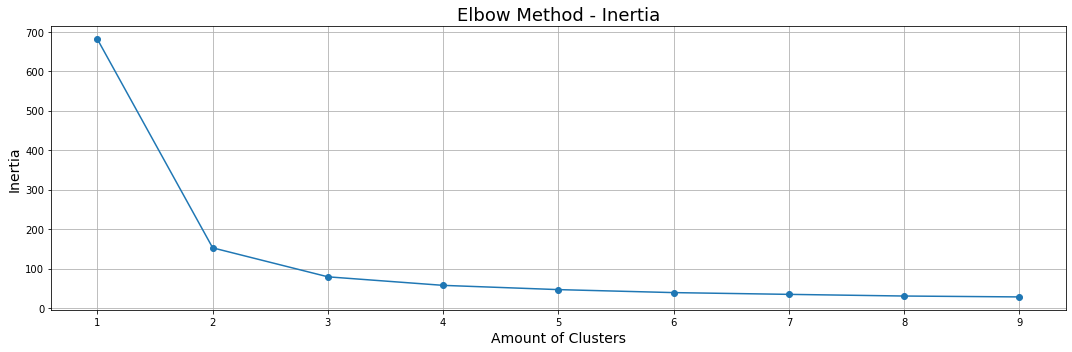

In [5]:
iner = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    iner.append(kmeans.inertia_)


plt.figure(figsize=(15,5))
plt.title("Elbow Method - Inertia", fontsize=18)
plt.plot(range(1,10),iner,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,10))
plt.tight_layout()
plt.show()

### Creating the Kmeans Function with Visuzalization

In [6]:
def KmeansClustering(k, x_variables, df):
    #Parameters - k for the number of clusters, x_variables for the features, df for the original dataset
    
    #Initializing the parameters
    kmeans = KMeans(n_clusters=k)
    
    #Fitting the model with the features
    x_variables['clusters'] = kmeans.fit_predict(x_variables)
    
    #Set Plot Size
    plt.figure(figsize=(24,4))

    #Show Kmeans Clusters Prediction
    plt.subplot(1,5,1)
    plt.title("Kmeans Clusters, K = " + str(k) ,fontsize=16)
    plt.ylabel("PetalWidthCm")
    plt.xlabel("PetalLengthCm")
    for x in range(k):
        plt.scatter(x_variables.PetalLengthCm[x_variables.clusters == x],x_variables.PetalWidthCm[x_variables.clusters == x])
    
    #Show Original Labels
    plt.subplot(1,5,2)
    plt.title("Original Labels",fontsize=16)
    plt.xlabel("PetalLengthCm")
    plt.scatter(df.PetalLengthCm[df.Species == "Iris-setosa"],df.PetalWidthCm[df.Species == "Iris-setosa"])
    plt.scatter(df.PetalLengthCm[df.Species == "Iris-versicolor"],df.PetalWidthCm[df.Species == "Iris-versicolor"])
    plt.scatter(df.PetalLengthCm[df.Species == "Iris-virginica"],df.PetalWidthCm[df.Species == "Iris-virginica"])
    
    #Show the plots and return the Kmeans Model
    plt.show()
    
    return kmeans

#### Notes:

1. The model uses unlabled data.
2. The original labels are displayed for double checking purposes.
3. The model uses all features for prediction, petal dimensions are arbitrarily chosen for visual purposes.

### Different Numbers of K

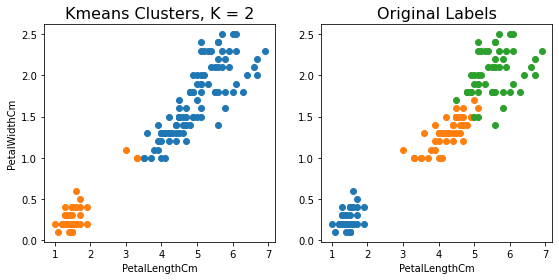

KMeans(n_clusters=2)

In [7]:
KmeansClustering(2, features, df)

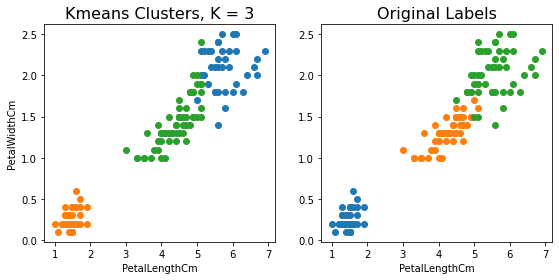

KMeans(n_clusters=3)

In [8]:
KmeansClustering(3, features, df)

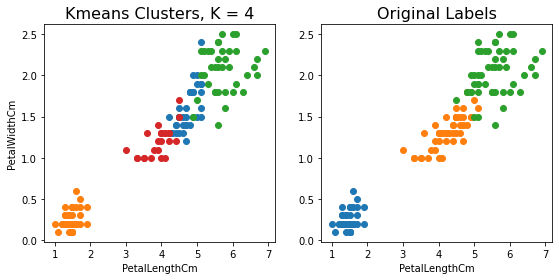

KMeans(n_clusters=4)

In [9]:
KmeansClustering(4, features, df)